In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [ ]:
# getting data
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
train_data = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [ ]:
train_data.filenames.shape, train_data.target.shape

((2034,), (2034,))

In [ ]:
print(train_data.data[0])

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


In [ ]:
train_data.target_names[train_data.target[0]]

'comp.graphics'

In [ ]:
train_data.target[:5]

array([1, 3, 2, 0, 2], dtype=int64)

In [ ]:
ntopics, ntop_words = 6, 8

## Stop words, stemming, lemmatization

In [ ]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hdotd\AppData\Roaming\nltk_data...


True

In [ ]:
from nltk import stem
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hdotd\AppData\Roaming\nltk_data...


True

In [ ]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [ ]:
words = ['feet', 'foot', 'foots', 'footing']

In [ ]:
[wnl.lemmatize(x) for x in words]

['foot', 'foot', 'foot', 'footing']

In [ ]:
[porter.stem(x) for x in words]

['feet', 'foot', 'foot', 'foot']

In [ ]:
from fastbook import *

ModuleNotFoundError: ignored

In [ ]:
path = Path("fruits-360_dataset/fruits-360/Training/")

In [ ]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=0.2),
               get_y=parent_label,
               item_tfms=[Resize(192, method="squish")]).dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


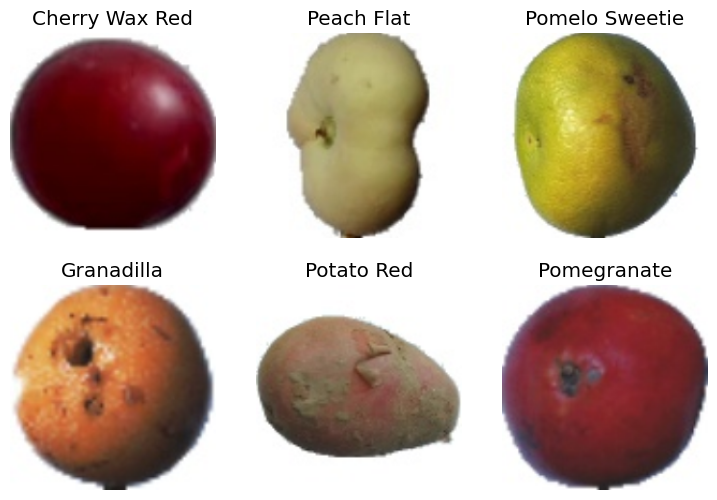

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learner = cnn_learner(dls, resnet101, metrics=error_rate)

c:\Users\hdotd\OneDrive\Desktop\AI workstation\deepEnvs\lib\site-packages\fastai\vision\learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
c:\Users\hdotd\OneDrive\Desktop\AI workstation\deepEnvs\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\hdotd\OneDrive\Desktop\AI workstation\deepEnvs\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pyt

  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
learner.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time


In [3]:
from transformers import pipeline

In [6]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [9]:
classifier(["what a good day I m having", 
            "I hate this weather but like this vibe"])

[{'label': 'POSITIVE', 'score': 0.9998801946640015},
 {'label': 'POSITIVE', 'score': 0.998474657535553}]

In [10]:
from transformers import AutoTokenizer

In [11]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [12]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [13]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

In [20]:
inputs = tokenizer(raw_inputs, padding=True, truncation=True,
                   return_tensors="pt")

In [21]:
inputs

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [22]:
from transformers import AutoModel

In [23]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['classifier.weight', 'classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
yh = model(**inputs)

In [30]:
yh.last_hidden_state.shape

torch.Size([2, 16, 768])

In [31]:
from transformers import AutoModelForSequenceClassification

In [32]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [33]:
outputs.logits.shape

torch.Size([2, 2])

In [34]:
outputs.logits

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)

In [35]:
import torch

In [38]:
preds = torch.nn.functional.softmax(outputs.logits, dim=-1)

In [39]:
preds

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)

In [40]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [1]:
from transformers import BertConfig, BertModel

In [2]:
config = BertConfig()
model = BertModel(config=config)

In [3]:
print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [5]:
model = BertModel.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
model.save_pretrained("model_sav/")

In [7]:
seq = ["hello!", "Good,", "day!"]

In [8]:
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

In [9]:
import torch
print(torch.cuda.is_available())

True


In [10]:
inputs = torch.tensor(encoded_sequences)

In [11]:
outputs = model(inputs)

In [14]:
print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4032e-02,
           3.9394e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6915e-02,
           2.8224e-01,  7.5566e-02],
         [ 1.1789e+00,  1.6739e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1968e-03]],

        [[ 3.6436e-01,  3.2464e-02,  2.0258e-01,  ...,  6.0110e-02,
           3.2451e-01, -2.0995e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4877e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1124e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1320e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6062e-02,
           3.3564e-01,  2

# Tokenizers

### Word-based tokenizer

In [18]:
words = "Niffoxic just learning a new library here nothing else"
tt = words.split()
print(tt)

['Niffoxic', 'just', 'learning', 'a', 'new', 'library', 'here', 'nothing', 'else']


Each word gets assigned an ID, starting from 0 and going up to the size of the vocabulary. The model uses these IDs to identify each word.

### character-based tokenizer.

Character-based tokenizers split the text into characters, rather than words. This has two primary benefits:

* The vocabulary is much smaller.
* There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.

In [24]:
ct = list(words)
print(ct)

['N', 'i', 'f', 'f', 'o', 'x', 'i', 'c', ' ', 'j', 'u', 's', 't', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'a', ' ', 'n', 'e', 'w', ' ', 'l', 'i', 'b', 'r', 'a', 'r', 'y', ' ', 'h', 'e', 'r', 'e', ' ', 'n', 'o', 't', 'h', 'i', 'n', 'g', ' ', 'e', 'l', 's', 'e']


### Subword tokenization

Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.

In [25]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [26]:
tokenizer(words)

{'input_ids': [101, 27453, 3101, 10649, 1596, 1198, 3776, 170, 1207, 3340, 1303, 1720, 1950, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [27]:
tokenizer.save_pretrained("tokenizer_sav/")

('tokenizer_sav/tokenizer_config.json',
 'tokenizer_sav/special_tokens_map.json',
 'tokenizer_sav/vocab.txt',
 'tokenizer_sav/added_tokens.json',
 'tokenizer_sav/tokenizer.json')

### Encoding - The tokenization pipeLine

In [29]:
inputs = tokenizer("tokenizing this example")

In [30]:
print(inputs["input_ids"])

[101, 22559, 4404, 1142, 1859, 102]


In [31]:
inputs

{'input_ids': [101, 22559, 4404, 1142, 1859, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [32]:
from transformers import AutoTokenizer

In [33]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [34]:
seq = "Using a transformer net is simple"

In [35]:
tokens = tokenizer.tokenize(seq)

In [36]:
print(tokens)

['Using', 'a', 'transform', '##er', 'net', 'is', 'simple']


In [38]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 11303, 1200, 5795, 1110, 3014]


In [40]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 5795, 1110, 3014])
print(decoded_string)

Using a transformer net is simple
